In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [44]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
print(X_train[0])

[59 62 63]


In [43]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [45]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
def image_train_plotter(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

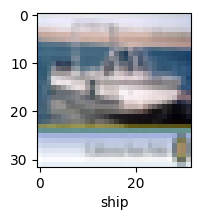

In [48]:
image_train_plotter(X_train, y_train, 155)

In [49]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [50]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [52]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 150s 95ms/step - loss: 1.8101 - accuracy: 0.3555


In [53]:
ann.evaluate(X_test, y_test)

'''The results obtained from artificial neural network is pretty bad, as this means
that we need to use convulutional neural networks for our work'''

313/313 [==============================] - 14s 45ms/step - loss: 1.6916 - accuracy: 0.4034


[1.6915949583053589, 0.4034000039100647]

In [54]:
# In this we now use the convulutional neural networks
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=20, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=48, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    #dense, lessen this as we are already pooling the main thing
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [55]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [57]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9610 - accuracy: 0.6645
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9019 - accuracy: 0.6857
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8498 - accuracy: 0.7035
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8080 - accuracy: 0.7181
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7726 - accuracy: 0.7322
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7378 - accuracy: 0.7414
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7071 - accuracy: 0.7534
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6783 - accuracy: 0.7630
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6494 - accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [58]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9646 - accuracy: 0.6947


[0.9646332859992981, 0.6947000026702881]

In [67]:
y_test=y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

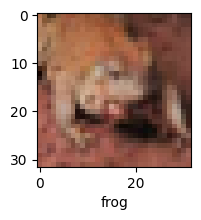

In [60]:
image_train_plotter(X_test, y_test, 5)

In [63]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.8205130e-04, 8.0119844e-06, 2.4151888e-03, 8.9598936e-01,
        2.8742096e-04, 7.1649566e-02, 2.7945841e-02, 1.5557349e-06,
        1.4097154e-03, 1.1128982e-05],
       [3.7008401e-03, 4.4963021e-02, 6.1891342e-08, 2.4646628e-08,
        6.3418709e-10, 7.5205613e-11, 4.1763940e-12, 1.9234257e-11,
        9.4850850e-01, 2.8275875e-03],
       [7.2971553e-02, 7.2935808e-01, 1.2813921e-02, 5.3970362e-03,
        6.4119726e-04, 5.2949373e-04, 1.9425670e-06, 4.8780948e-04,
        1.4427231e-01, 3.3526607e-02],
       [9.4065672e-01, 6.8626797e-04, 9.0864031e-03, 8.8245244e-05,
        2.0326652e-04, 1.9427675e-07, 2.2715217e-06, 2.4669787e-06,
        4.8857577e-02, 4.1644269e-04],
       [2.8858764e-07, 5.3532773e-08, 6.8312311e-03, 7.1920530e-04,
        7.9159003e-01, 3.4467885e-04, 2.0051096e-01, 2.3899388e-06,
        1.1184786e-06, 9.8835651e-09]], dtype=float32)

In [69]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 1, 0, 4, 6, 1, 6, 3, 1]